# **Proyek Klasifikasi Konsumsi Listrik Rumah Tangga (Time Series Classification)**

## **1. Business Understanding**

Tahap pertama dalam metodologi CRISP-DM adalah memahami konteks masalah, tujuan bisnis, dan persyaratan teknis proyek sebelum melakukan pemrosesan data.

### **1.1 Latar Belakang Masalah**

Pemerintah Inggris memiliki target agresif untuk mengurangi jejak karbon (carbon footprint). Sektor perumahan adalah salah satu kontributor terbesar, namun sangat sulit dikelola karena perilaku konsumsi listrik terjadi di balik pintu tertutup. Studi "Powering the Nation" diluncurkan untuk memecahkan masalah "kotak hitam" ini.

Masalah Bisnis: Meteran listrik konvensional hanya memberikan satu angka total di akhir bulan. Tanpa mengetahui perangkat apa yang menyedot listrik dan kapan digunakan, konsumen tidak bisa melakukan penghematan yang efektif, dan perusahaan listrik tidak bisa mengelola beban puncak (peak load).

### **1.2 Tujuan Proyek**

Tujuan utama dari analisis ini adalah:

1. **Identifikasi Perangkat Otomatis (NILM)**: Mengembangkan algoritma yang mampu mengenali jenis peralatan elektronik hanya dari pola "denyut" listriknya setiap 15 menit dalam 1 hari.

2. **Efisiensi Komputasi**: Menggunakan metode ROCKET untuk memastikan klasifikasi berjalan cepat (real-time) meskipun memproses data dari ribuan rumah tangga.

### **1.3 Tujuan Data Mining**

1. Klasifikasi Akurat & Cepat: Membangun model ROCKET untuk mengklasifikasikan 7 kelas perangkat dengan akurasi yang dapat diandalkan (target >70-80% pada data uji).
2. Feature Extraction: Memanfaatkan kemampuan ROCKET untuk menghasilkan ribuan fitur konvolusional acak (random kernels) yang dapat menangkap karakteristik bentuk (shape) dan frekuensi sinyal listrik 15-menit yang mungkin terlewatkan oleh metode statistik biasa.
3. Efisiensi Waktu Pelatihan: Membuktikan bahwa waktu pelatihan model (training time) secara signifikan lebih cepat dibandingkan metode baseline lain, mendukung argumen skalabilitas bisnis.

### **1.4 Kriteria Kesuksesan**

- Akurasi Model: Mengingat data 15 menit menghilangkan banyak detail (seperti putaran motor cepat), target akurasi yang realistis adalah di atas 70-75%.

- Kecepatan: Model ROCKET harus mampu melatih dan memprediksi data dalam waktu singkat untuk membuktikan kelayakan implementasi pada edge device (meteran pintar).

## **2. Data Understanding**

Tahap ini berfokus pada pengumpulan, deskripsi, dan eksplorasi data untuk memastikan kualitas dan kesesuaiannya dengan tujuan proyek. Berikut adalah detail lengkap mengenai dataset ElectricDevices.

### **2.1 Sumber Data**

Data yang digunakan dalam proyek ini diklasifikasikan sebagai data empiris (real-world data), bukan data simulasi sintetis. Data ini memiliki rekam jejak yang jelas mulai dari studi pemerintah hingga menjadi standar akademik.

- **Program Asal:** Data diekstraksi dari studi Household Electricity Survey (HES) yang lebih dikenal dengan nama "Powering the Nation".
- **Penyelenggara:** Studi ini didanai oleh Pemerintah Inggris melalui Department for Environment, Food and Rural Affairs (DEFRA) dan Department of Energy and Climate Change (DECC).
- **Pembuat Dataset:** Data mentah dari survei pemerintah tersebut kemudian diproses, dibersihkan, dan diformat ulang menjadi dataset benchmark ElectricDevices oleh peneliti dari University of East Anglia (UEA), yaitu Jason Lines dan Anthony Bagnall.
- **Referensi Akademik:** Dataset ini pertama kali diperkenalkan pada konferensi SIAM International Conference on Data Mining (SDM) 2014, dipublikasikan dalam jurnal *Lines, J., & Bagnall, A. (2014). Time series classification with ensembles of elastic distance measures. Data Mining and Knowledge Discovery.*

### **2.2 Metodologi Pengambilan Data**

Cara data ini diambil sangatlah detail dan invasif (memerlukan pemasangan alat di dalam rumah), yang menjadikannya "Gold Standard" untuk perilaku konsumsi listrik:
1. Subjek Survei: Melibatkan 251 rumah tangga di seluruh Inggris.
2. Sensor: Berbeda dengan smart meter biasa yang hanya mengukur total satu rumah, studi ini memasang sensor pemantau (meteran) langsung pada setiap perangkat elektronik (seperti di colokan kulkas, di sirkuit mesin cuci, dll).

### **2.3 Transformasi Dataset**

Dataset ElectricDevices yang Anda gunakan saat ini memiliki panjang **96 titik**. Angka ini adalah hasil dari proses resampling (penurunan resolusi) dari data mentah 2 menit menjadi interval 15 menit.

**Kutipan Jurnal:** 
> "The datasets that we introduce support the goal of promoting further understanding of domestic electricity consumption by classifying appliances according to their electricity usage profiles. The data contains readings from 251 households, sampled in two-minute intervals over a month. When designing the classification problems we took our previous work in Lines et al. (2011) into account. We originally classified 10 device types according to daily and weekly profiles sampled over **15-minute intervals**. This work influenced the creation of the new datasets in two regards... bias was introduced into classification results as decisions were made by matching the specific device, rather than classifying the class of the devices."

**Sumber:** Lines, J., & Bagnall, A. (2014). Time series classification with ensembles of elastic distance measures. *Data Mining and Knowledge Discovery*.

**Link Jurnal:** [Disini](https://d1wqtxts1xzle7.cloudfront.net/34308262/LinesDAMI2014-libre.pdf?1406559923=&response-content-disposition=inline%3B+filename%3DTime_series_classification_with_ensemble.pdf&Expires=1765773360&Signature=ZPJVKGDbicBsrGd836jy3Ic9RW-Ratgd4dxqJbjmHxBsxzvhlgxj2larFSc6OReAkstKJ2E4iPUp7GC1BHVCYj1qjYWIIxiS2fEZNBVEy1kZ9eHI-8dFry8u~gT5lbW0xMHzUO1BHYwEVnqJBR~9Cq9oF2zkiFZRxPV8wdFvNXF2ugEZigovGblgOlBiq2dt6ARt6BCfAxMp1BuCFVcaVwqFDmHE-FHLApp9Q21m5B8Vg9hEfMpt7AUruJXKpNJZSZSWreBvHLtnx53sr4dtHjcDs~jEkuxU6pgYVPW0Ot4OQzO60MAogpXf~mpWHgiBkyGCn4rqOKPlBL3FQGIgAQ__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

**Analisis Derivasi Teknis**

Berdasarkan kutipan di atas, format data 96 titik diturunkan sebagai berikut:

- **Interval Waktu:** Data diformat ulang menjadi interval 15 menit sesuai standar eksperimen smart meter.
- **Kalkulasi:** Dalam satu hari (24 jam) terdapat 1.440 menit.

$$\frac{1.440 \text{ menit}}{15 \text{ menit}} = \mathbf{96 \text{ titik data}}$$

- **Implikasi:** Setiap titik data dalam dataset Anda mewakili rata-rata konsumsi daya perangkat selama jendela waktu 15 menit tersebut.

### **2.4 Deskripsi Label Kelas**

Terdapat 7 kelas yang merepresentasikan perangkat rumah tangga dominan. Berdasarkan literatur pendukung (Lines & Bagnall, 2014), ketujuh kelas tersebut dipetakan sebagai berikut:

**Tabel: Karakteristik Pola Konsumsi Listrik Perangkat Elektronik**

| ID | Label Kelas      | Karakteristik Pola pada Data 96 Titik (15 Menit)                                                                                                                                                    |
| -- | ---------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1  | Kettle (Ketel)   | Pola **Spike**: Lonjakan daya sangat tinggi namun durasi asli hanya 2–3 menit. Pada data 15 menit, ini terkompresi menjadi satu titik lonjakan tajam (*single spike*) di tengah data yang rata (0). |
| 2  | Immersion Heater | Pola **Block**: Pemanas air tangki bekerja stabil selama 30–60 menit. Ini muncul sebagai dataran tinggi (*plateau*) yang terdiri dari 2 hingga 4 titik berturut-turut.                              |
| 3  | Washing Machine  | Pola **Sekuensial**: Siklus panjang (1–2 jam) yang dinamis. Diawali dengan daya tinggi (pemanas air) diikuti fluktuasi rendah (motor). Terlihat sebagai gelombang yang melandai.                    |
| 4  | Dishwasher       | Pola **Bimodal**: Memiliki dua puncak terpisah (fase cuci panas di awal dan fase pengeringan panas di akhir) yang dipisahkan oleh jeda waktu.                                                       |
| 5  | Oven / Cooker    | Pola **Fluktuatif**: Digunakan selama 30–90 menit. Karena termostat menyala–mati untuk menjaga suhu, polanya terlihat bergerigi kasar pada level daya tinggi.                                       |
| 6  | Fridge / Freezer | Pola **Periodik**: Menyala 24 jam dengan siklus kompresor otomatis. Polanya berupa osilasi teratur (*on–off*) yang berulang sepanjang 96 titik (seperti detak jantung).                             |
| 7  | Computer         | Pola **Stasioner**: Daya rendah dan stabil selama digunakan. Terlihat sebagai garis datar atau fluktuasi sangat minim tanpa lonjakan ekstrem.                                                       |

**Sumber:** Diadaptasi dari Tony Bagnall (University of East Anglia)
**Link:** [Disini](https://indico.in2p3.fr/event/13186/contributions/13377/attachments/11266/13898/TonyBagnall-InterdisciplinaryTimeSeriesWorkshop-ParisJun2016.pdf)

Karena kita akan menerapkan strategi pembagian data kustom (*3-Way Split: Train, Test Model, Test Manual*), langkah pertama yang wajib dilakukan adalah **Menggabungkan (Merging)** file `TRAIN` dan `TEST` bawaan menjadi satu dataset utuh.

**Fokus Analisis:**
1.  **Total Populasi:** Memastikan total data gabungan sesuai (16.637 sampel).
2.  **Kualitas Data:** Memastikan tidak ada *Missing Values* (NaN) yang dapat merusak model.
3.  **Distribusi Kelas:** Membuktikan adanya *Class Imbalance* pada dataset gabungan.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.datasets import load_from_tsfile

print("1. Memuat Data Mentah...")
X_train_raw, y_train_raw = load_from_tsfile("ElectricDevices_TRAIN.ts")
X_test_raw, y_test_raw = load_from_tsfile("ElectricDevices_TEST.ts")

y_train_raw = y_train_raw.astype(int)
y_test_raw = y_test_raw.astype(int)

print(f"   - Train Asli : {X_train_raw.shape[0]}")
print(f"   - Test Asli  : {X_test_raw.shape[0]}")

print("\n2. Menggabungkan Dataset...")
X_total = pd.concat([X_train_raw, X_test_raw], axis=0).reset_index(drop=True)
y_total = np.concatenate([y_train_raw, y_test_raw], axis=0)

print(f"TOTAL DATA GABUNGAN: {X_total.shape[0]} Sampel")
print(f"Jumlah Fitur Waktu : {len(X_total.iloc[0, 0])} titik")

1. Memuat Data Mentah...
   - Train Asli : 8926
   - Test Asli  : 7711

2. Menggabungkan Dataset...
TOTAL DATA GABUNGAN: 16637 Sampel
Jumlah Fitur Waktu : 96 titik


In [9]:
print("Contoh 1 sampel data time-series:")

sample_idx = 0
print(f"\nIndex: {sample_idx}")
print("Label :", y_total[sample_idx])
print("Data  :", X_total.iloc[sample_idx, 0].values)

Contoh 1 sampel data time-series:

Index: 0
Label : 1
Data  : [-0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903
 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -0.18610903 -

Cek missing value dan distribusi class

C:\Users\user\AppData\Local\Temp\ipykernel_14292\838886649.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  has_nan = X_total.applymap(lambda x: np.isnan(x).any()).values.sum()


Status Missing Values: BERSIH (Tidak ada NaN)


C:\Users\user\AppData\Local\Temp\ipykernel_14292\838886649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_total, palette="viridis")


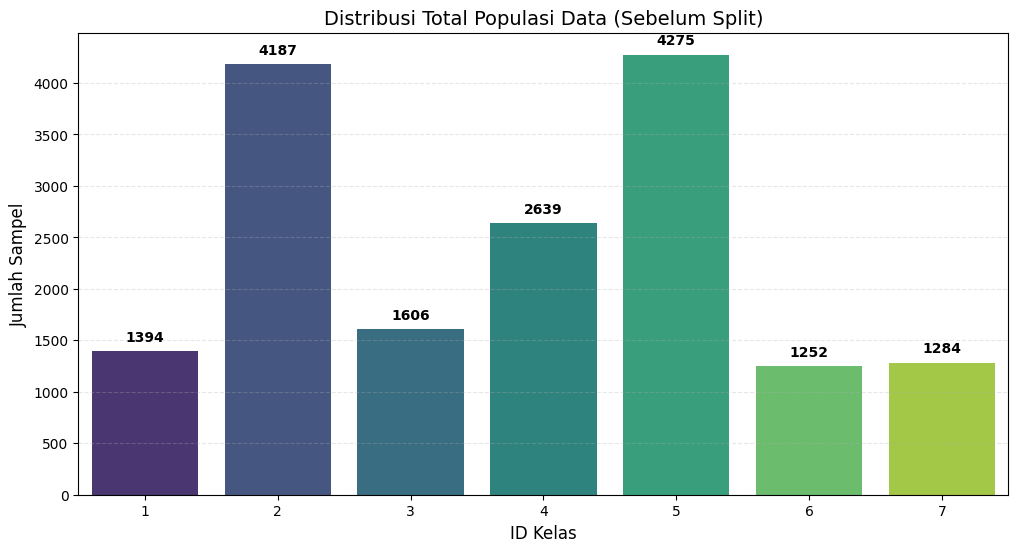


Rincian Jumlah Data per Kelas:
1    1394
2    4187
3    1606
4    2639
5    4275
6    1252
7    1284
Name: count, dtype: int64


In [10]:
# 1. Cek Missing Values
# (Mengecek apakah ada NaN di dalam nested series)
has_nan = X_total.applymap(lambda x: np.isnan(x).any()).values.sum()
print(f"Status Missing Values: {'ADA KEBOCORAN' if has_nan > 0 else 'BERSIH (Tidak ada NaN)'}")

# 2. Visualisasi Distribusi Kelas (Imbalance Check)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=y_total, palette="viridis")

plt.title("Distribusi Total Populasi Data (Sebelum Split)", fontsize=14)
plt.xlabel("ID Kelas", fontsize=12)
plt.ylabel("Jumlah Sampel", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Menampilkan jumlah angka di atas batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points', fontweight='bold')

plt.show()

# Tampilkan tabel jumlah
print("\nRincian Jumlah Data per Kelas:")
print(pd.Series(y_total).value_counts().sort_index())

Contoh data dalam plot grafik per class


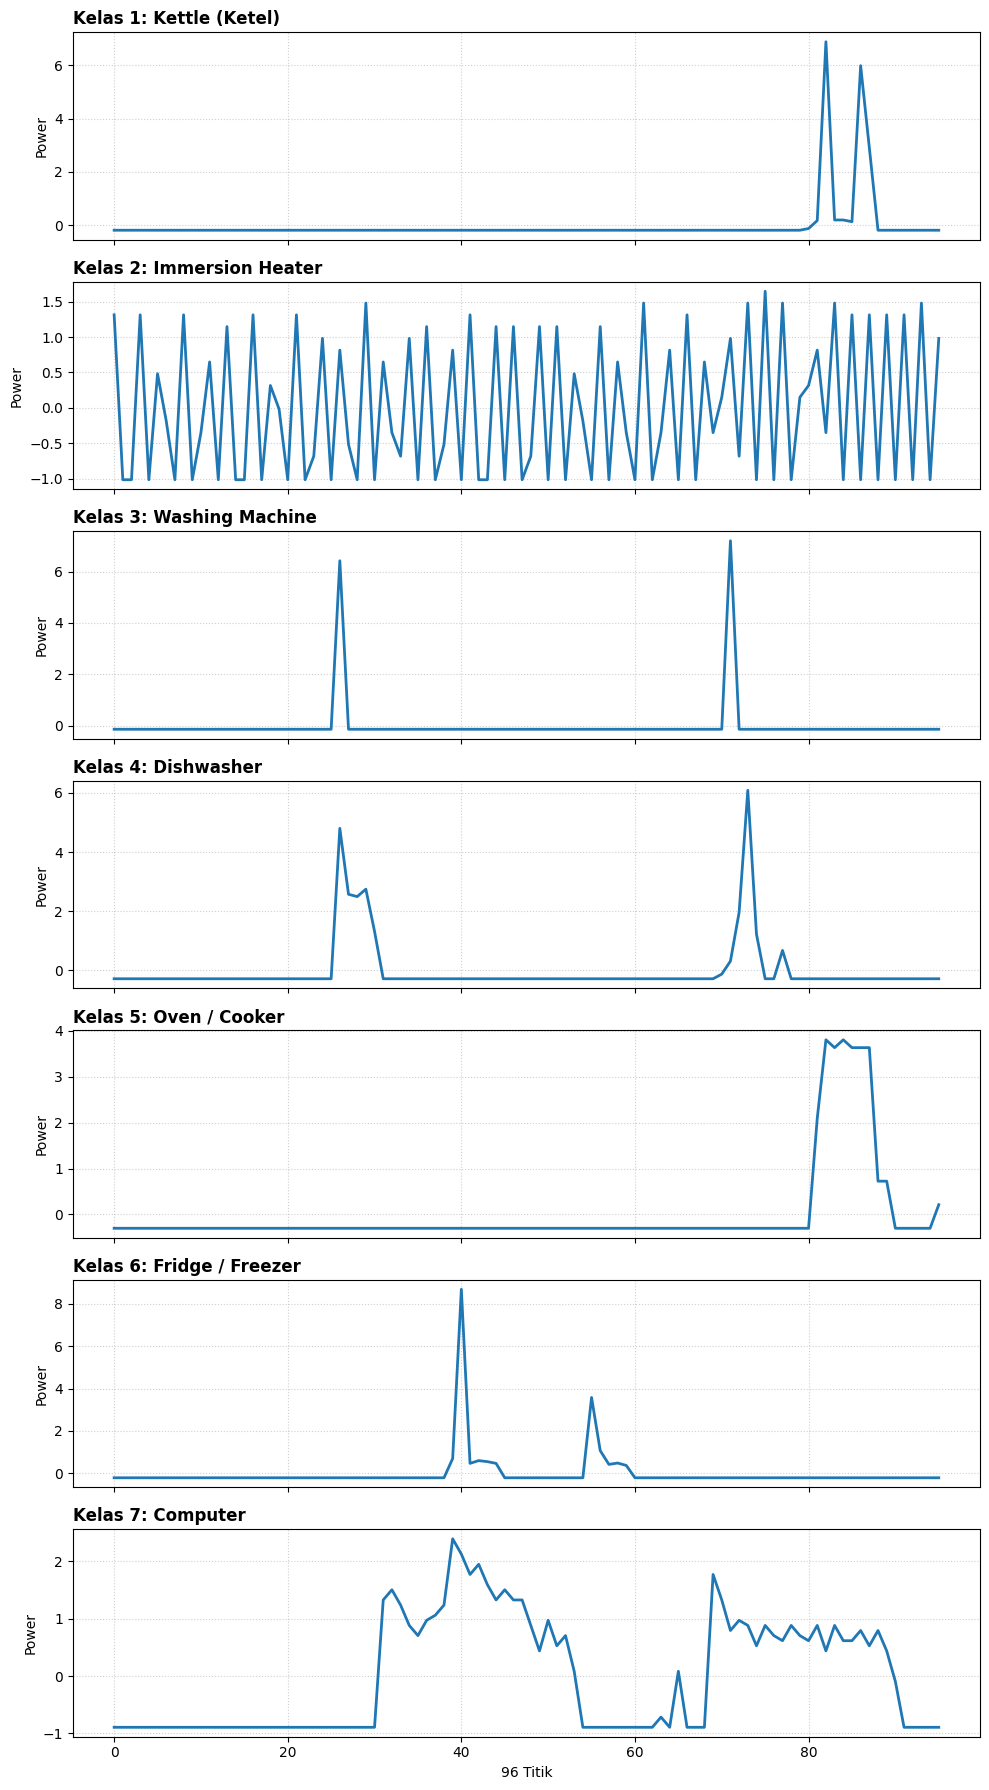

In [11]:
class_names = {
    1: 'Kettle (Ketel)', 2: 'Immersion Heater', 3: 'Washing Machine',
    4: 'Dishwasher', 5: 'Oven / Cooker', 
    6: 'Fridge / Freezer', 7: 'Computer'
}

# Plot 7 Grafik (Satu per Kelas)
fig, axes = plt.subplots(7, 1, figsize=(10, 18), sharex=True)

for i, class_id in enumerate(range(1, 8)):
    # Ambil sampel pertama yang ditemukan untuk kelas ini
    idx = np.where(y_total == class_id)[0][0]
    series_data = X_total.iloc[idx, 0] 

    # Plot
    axes[i].plot(series_data, color='#1f77b4', linewidth=2)
    axes[i].set_title(f"Kelas {class_id}: {class_names[class_id]}", fontweight='bold', loc='left')
    axes[i].set_ylabel("Power")
    axes[i].grid(True, linestyle=':', alpha=0.6)

plt.xlabel("96 Titik")
plt.tight_layout()
plt.show()

## **3. Data Preprocessing (Persiapan & Pembagian Data)**

Sesuai strategi rancangan baru, kita akan membagi total dataset (16.637 sampel) menjadi tiga bagian terpisah menggunakan teknik **Stratified Shuffle Split** untuk menjaga proporsi kelas.

**Skema Pembagian:**
1.  **Tahap 1 (Isolasi Data Manual):** Memisahkan sekitar **33%** data (~5.480 sampel) untuk disimpan sebagai file CSV. Data ini **tidak akan disentuh** oleh model selama pelatihan, melainkan digunakan khusus untuk uji coba manual pada aplikasi Streamlit.
2.  **Tahap 2 (Train-Test Split):** Sisa data (~11.157 sampel) akan dibagi dengan rasio **80:20**.
    * **Data Train (80%):** ~8.926 sampel (Untuk melatih ROCKET).
    * **Data Test (20%):** ~2.231 sampel (Untuk evaluasi akurasi statistik).

In [12]:
from sklearn.model_selection import train_test_split

print("MEMULAI PROSES PEMBAGIAN DATA (STRATIFIED)...")

# --- TAHAP 1: MEMISAHKAN DATA MANUAL (HOLDOUT) ---
# Target: ~5.480 data dari 16.637 adalah sekitar 32.9% (kita bulatkan 0.33)
# Sisa: ~11.157 data (67%)
X_sisa, X_manual, y_sisa, y_manual = train_test_split(
    X_total, y_total,
    test_size=0.33,      
    random_state=42,
    stratify=y_total
)

print(f"\n[TAHAP 1 SELESAI]")
print(f"   - Data Disimpan untuk Manual : {X_manual.shape[0]} baris")
print(f"   - Data Sisa untuk Modeling   : {X_sisa.shape[0]} baris")


# --- TAHAP 2: MEMBAGI DATA MODEL (TRAIN 80% : TEST 20%) ---
# Inputnya adalah X_sisa (11.157 data)
X_train, X_test, y_train, y_test = train_test_split(
    X_sisa, y_sisa,
    test_size=0.20, 
    random_state=42,
    stratify=y_sisa
)

print(f"\n[TAHAP 2 SELESAI]")
print(f"   - Data Latih (TRAIN) : {X_train.shape[0]} baris (Target: ~8.900)")
print(f"   - Data Uji (TEST)    : {X_test.shape[0]} baris (Target: ~2.200)")

MEMULAI PROSES PEMBAGIAN DATA (STRATIFIED)...

[TAHAP 1 SELESAI]
   - Data Disimpan untuk Manual : 5491 baris
   - Data Sisa untuk Modeling   : 11146 baris

[TAHAP 2 SELESAI]
   - Data Latih (TRAIN) : 8916 baris (Target: ~8.900)
   - Data Uji (TEST)    : 2230 baris (Target: ~2.200)


In [13]:
print("Sedang menyimpan data manual ke CSV...")

# 1. Flattening Data
X_manual_flat = np.array([series.values for series in X_manual.iloc[:, 0]])

# 2. Buat DataFrame Biasa
df_manual = pd.DataFrame(X_manual_flat)

df_manual['class_label'] = y_manual

# 4. Simpan ke File
nama_file_csv = "data_test_manual_5490.csv"
df_manual.to_csv(nama_file_csv, index=False, header=False)

print(f"FILE BERHASIL DISIMPAN: {nama_file_csv}")
print(f"   - Dimensi File: {df_manual.shape}")

Sedang menyimpan data manual ke CSV...
FILE BERHASIL DISIMPAN: data_test_manual_5490.csv
   - Dimensi File: (5491, 97)


## **4. Modeling (Pembuatan Model)**

Fase ini adalah inti dari proses pembelajaran mesin. Kita akan melatih model menggunakan data *Training* yang telah dipisahkan (8.926 sampel) menggunakan arsitektur **ROCKET**.

**Spesifikasi Model:**
1.  **Transformasi Fitur:** Menggunakan **ROCKET** (*Random Convolutional Kernel Transform*) untuk mengubah data deret waktu mentah (96 titik) menjadi 10.000 fitur *kernel*. Fitur ini menangkap karakteristik bentuk gelombang, frekuensi, dan durasi yang krusial untuk membedakan perangkat dengan pola mirip.
2.  **Klasifikasi:** Menggunakan **Ridge Classifier** karena efisiensinya dalam menangani jumlah fitur yang sangat besar (10.000 fitur).
3.  **Strategi Balancing:** Mengaktifkan parameter `class_weight='balanced'` pada classifier. Ini memberikan penalti (bobot kesalahan) yang lebih besar jika model salah memprediksi kelas minoritas (seperti *Washing Machine*), sehingga model dipaksa untuk memprioritaskan akurasi pada kelas tersebut tanpa perlu *oversampling* fisik.

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import Rocket
import time

print("MEMULAI PROSES TRAINING MODEL...")
print(f"   - Data Latih yang digunakan : {X_train.shape[0]} baris")

start_time = time.time()

# 1. Definisikan Pipeline
# Rocket: 10.000 kernel (standar untuk akurasi tinggi)
# RidgeClassifier: class_weight='balanced' adalah SOLUSI IMBALANCE kita
rocket_pipeline = make_pipeline(
    Rocket(num_kernels=10000, random_state=42),
    RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), class_weight='balanced')
)

# 2. Latih Model (Fitting)
rocket_pipeline.fit(X_train, y_train)

print("-" * 50)
print("   Model ROCKET kini sudah 'pintar' dan siap dievaluasi.")

MEMULAI PROSES TRAINING MODEL...
   - Data Latih yang digunakan : 8916 baris
--------------------------------------------------
   Model ROCKET kini sudah 'pintar' dan siap dievaluasi.


## **5. Evaluation (Evaluasi Model)**

Tahap ini bertujuan untuk mengukur kinerja model secara statistik menggunakan **Data Test** (~2.231 sampel).

**Metrik Evaluasi Utama:**
1.  **Akurasi Total:** Target keberhasilan > 85%.
2.  **Recall Kelas 6 (Washing Machine):** Ini adalah metrik paling kritis. Kita ingin melihat apakah strategi `class_weight='balanced'` berhasil meningkatkan kemampuan model dalam mendeteksi Mesin Cuci (mengurangi *False Negative*).
3.  **Confusion Matrix:** Peta visual untuk memastikan tidak ada lagi kebingungan signifikan antara *Washing Machine* (Kelas 6) dan *Dishwasher* (Kelas 4).

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Sedang melakukan prediksi pada Data Test ({X_test.shape[0]} sampel)...")

# 1. Lakukan Prediksi
y_pred = rocket_pipeline.predict(X_test)

# 2. Hitung Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"\n>>> AKURASI ROCKET: {acc * 100:.2f}% <<<")

# 3. Laporan Detail per Kelas
target_names = [
    '1: Kettle (Ketel)', '2: Immersion Heater', '3: Washing Machine',
    '4: Dishwasher', '5: Oven / Cooker', 
    '6: Fridge / Freezer', '7: Computer'
]


print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred, target_names=target_names))

Sedang melakukan prediksi pada Data Test (2230 sampel)...

>>> AKURASI ROCKET: 86.28% <<<

--- CLASSIFICATION REPORT ---
                     precision    recall  f1-score   support

  1: Kettle (Ketel)       0.82      0.90      0.86       187
2: Immersion Heater       0.94      0.97      0.96       561
 3: Washing Machine       0.76      0.86      0.80       215
      4: Dishwasher       0.80      0.75      0.78       354
   5: Oven / Cooker       0.93      0.86      0.90       573
6: Fridge / Freezer       0.85      0.86      0.86       168
        7: Computer       0.71      0.70      0.70       172

           accuracy                           0.86      2230
          macro avg       0.83      0.84      0.84      2230
       weighted avg       0.86      0.86      0.86      2230



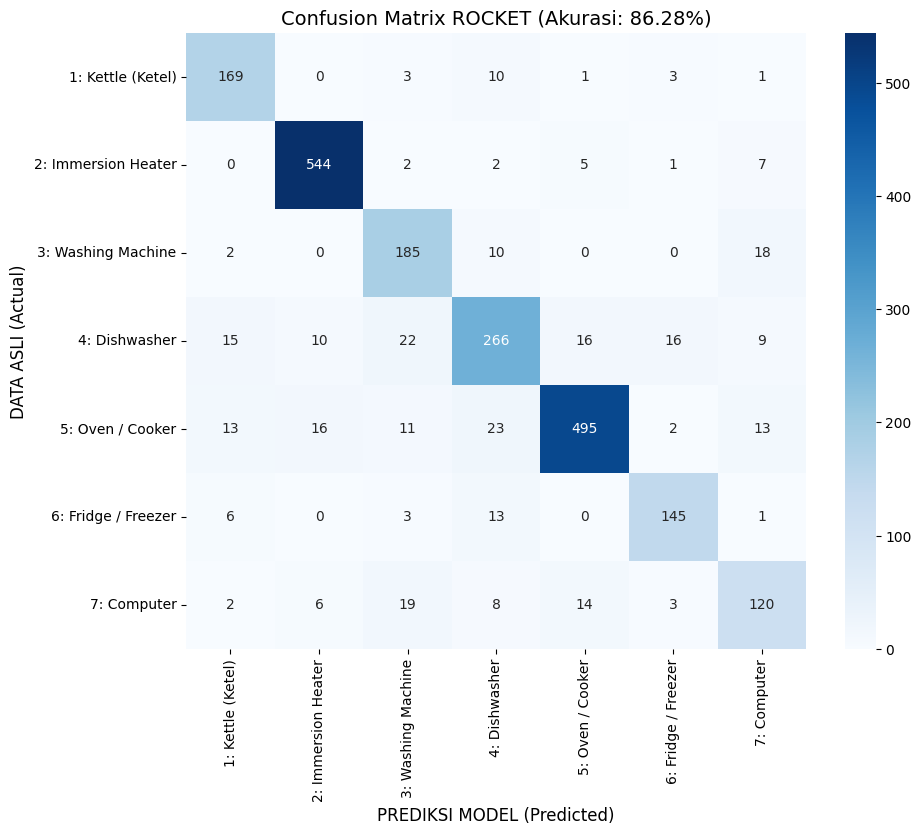

In [16]:
plt.figure(figsize=(10, 8))

# Buat Matrix
cm = confusion_matrix(y_test, y_pred)

# Gambar Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel('PREDIKSI MODEL (Predicted)', fontsize=12)
plt.ylabel('DATA ASLI (Actual)', fontsize=12)
plt.title(f'Confusion Matrix ROCKET (Akurasi: {acc*100:.2f}%)', fontsize=14)
plt.show()

## **6. Deployment & Manual Testing**

Setelah model tervalidasi dengan akurasi **86.28%**, tahap terakhir adalah menyimpan model (*model export*) dan melakukan simulasi penggunaan dunia nyata.

Kita akan menggunakan **Data Manual** (~5.480 sampel) yang telah dipisahkan sejak awal (di Tahap 3.1). Data ini benar-benar *unseen* (tidak pernah disentuh saat training maupun evaluasi statistik), sehingga menjadi standar pengujian "kotak hitam" (*black-box testing*) yang paling valid.

In [17]:
import joblib
import os

# Nama file model final
filename = 'rocket_electric_model_final.pkl'

print(f"Sedang menyimpan model ke file '{filename}'...")
joblib.dump(rocket_pipeline, filename)

print(f"MODEL BERHASIL DISIMPAN: {filename}")
print(f"   Ukuran file: {os.path.getsize(filename) / 1024 / 1024:.2f} MB")
print("\n[INSTRUKSI SELANJUTNYA]")
print("Silakan download 2 file ini dari panel 'Files' di sebelah kiri:")
print("1. " + filename + " (Otak AI)")
print("2. data_test_manual_5490.csv (Data untuk tes manual)")

Sedang menyimpan model ke file 'rocket_electric_model_final.pkl'...
MODEL BERHASIL DISIMPAN: rocket_electric_model_final.pkl
   Ukuran file: 1.64 MB

[INSTRUKSI SELANJUTNYA]
Silakan download 2 file ini dari panel 'Files' di sebelah kiri:
1. rocket_electric_model_final.pkl (Otak AI)
2. data_test_manual_5490.csv (Data untuk tes manual)
